In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Crop_Production_data.csv")

In [4]:
data.head()


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [5]:
data.shape


(246091, 7)

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [13]:
data.index

RangeIndex(start=0, stop=246091, step=1)

In [9]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

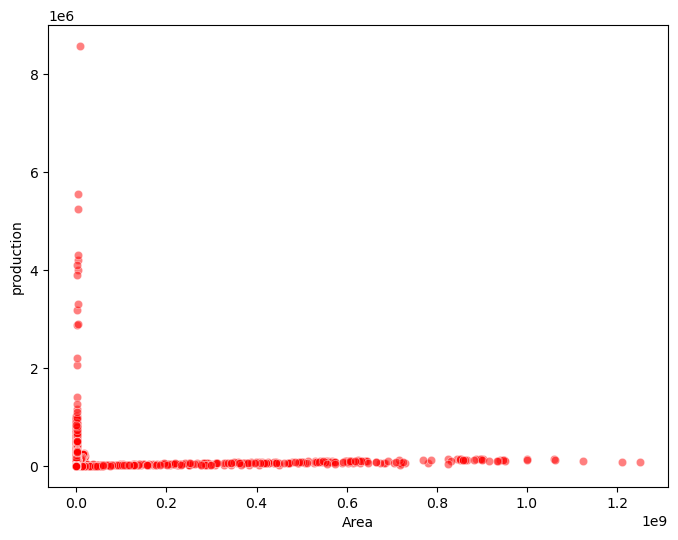

In [21]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=data, x= "Production", y="Area", color = "red", alpha=0.5)
plt.xlabel("Area")
plt.ylabel("production")
plt.show()

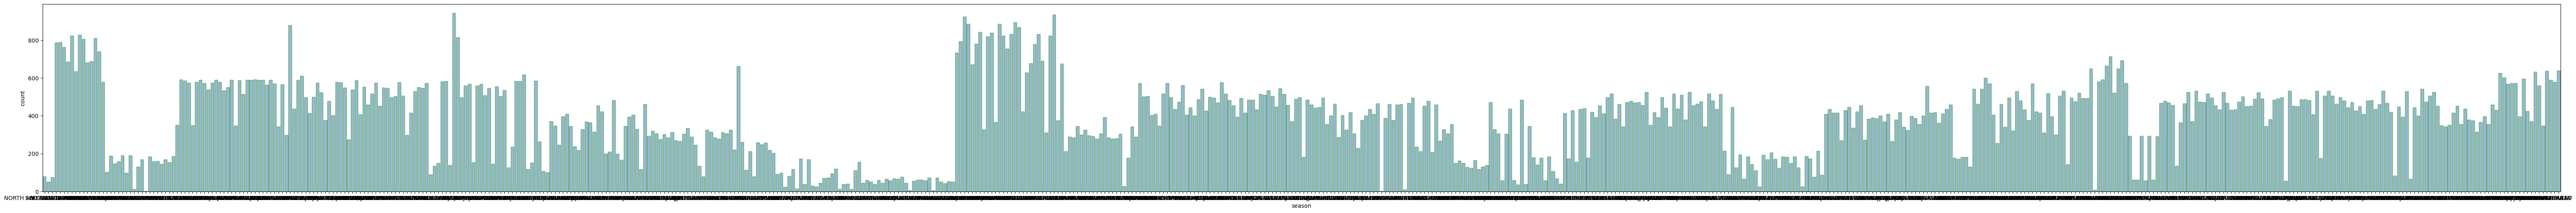

In [33]:
plt.figure(figsize=(80,6))

# sns.countplot(data=data, x="Season", edgecolor = "green", alpha=0.5 )
sns.countplot(data=data, x="District_Name", edgecolor = "green", alpha=0.5 )

plt.xlabel("season")
plt.ylabel("count")
plt.show()

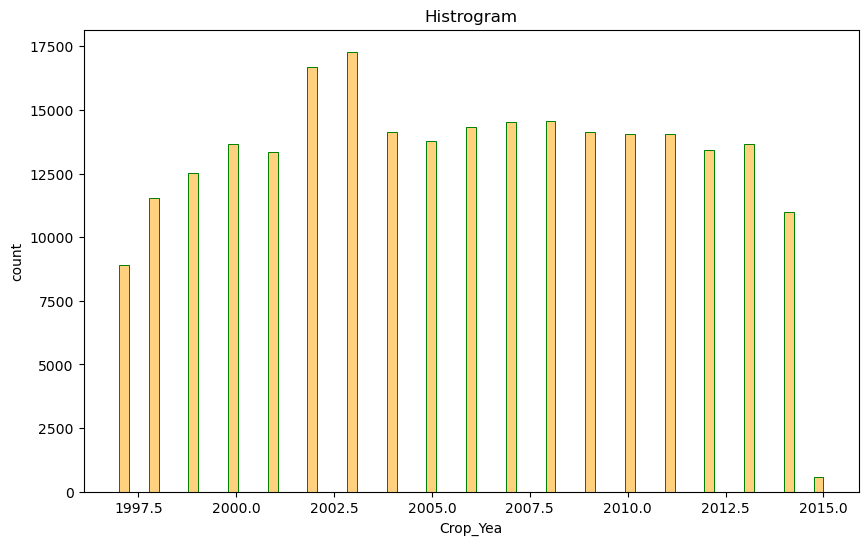

In [32]:
plt.figure(figsize=(10,6))

sns.histplot(data=data, x="Crop_Year", color= "orange", edgecolor = "green", alpha=0.5 )

plt.title("Histrogram")
plt.xlabel("Crop_Yea")
plt.ylabel("count")
plt.show()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_21112\1123748486.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Production'].fillna(data['Production'].median(), inplace=True)


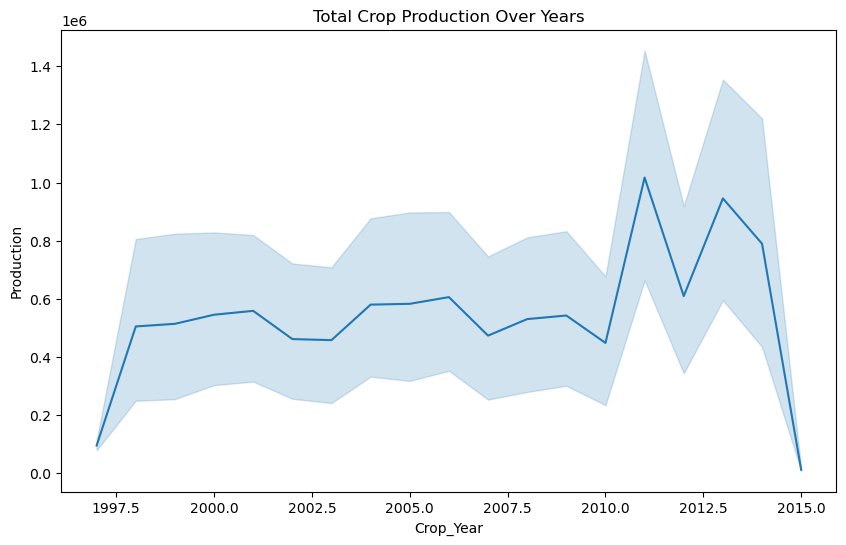

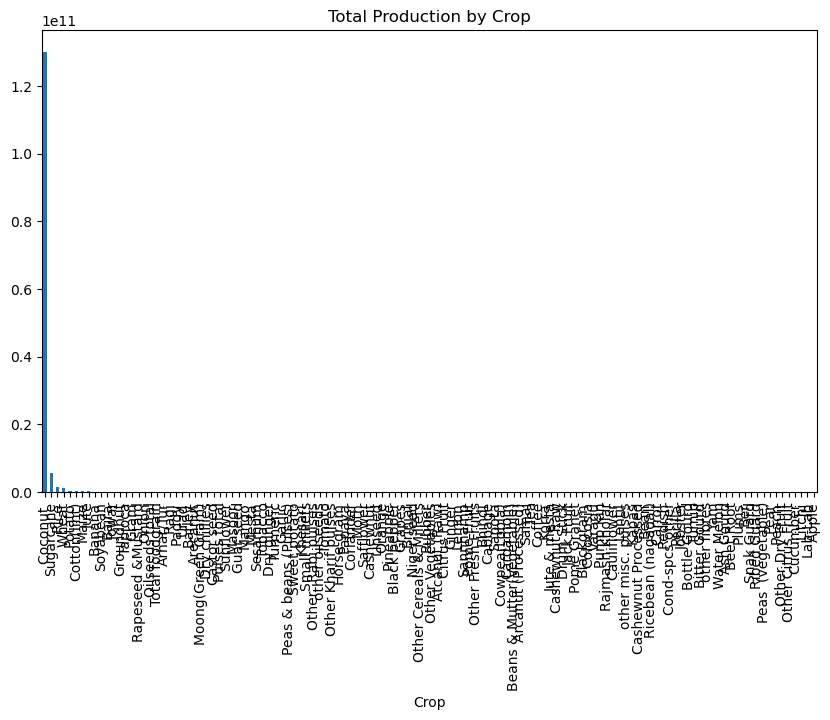

c:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


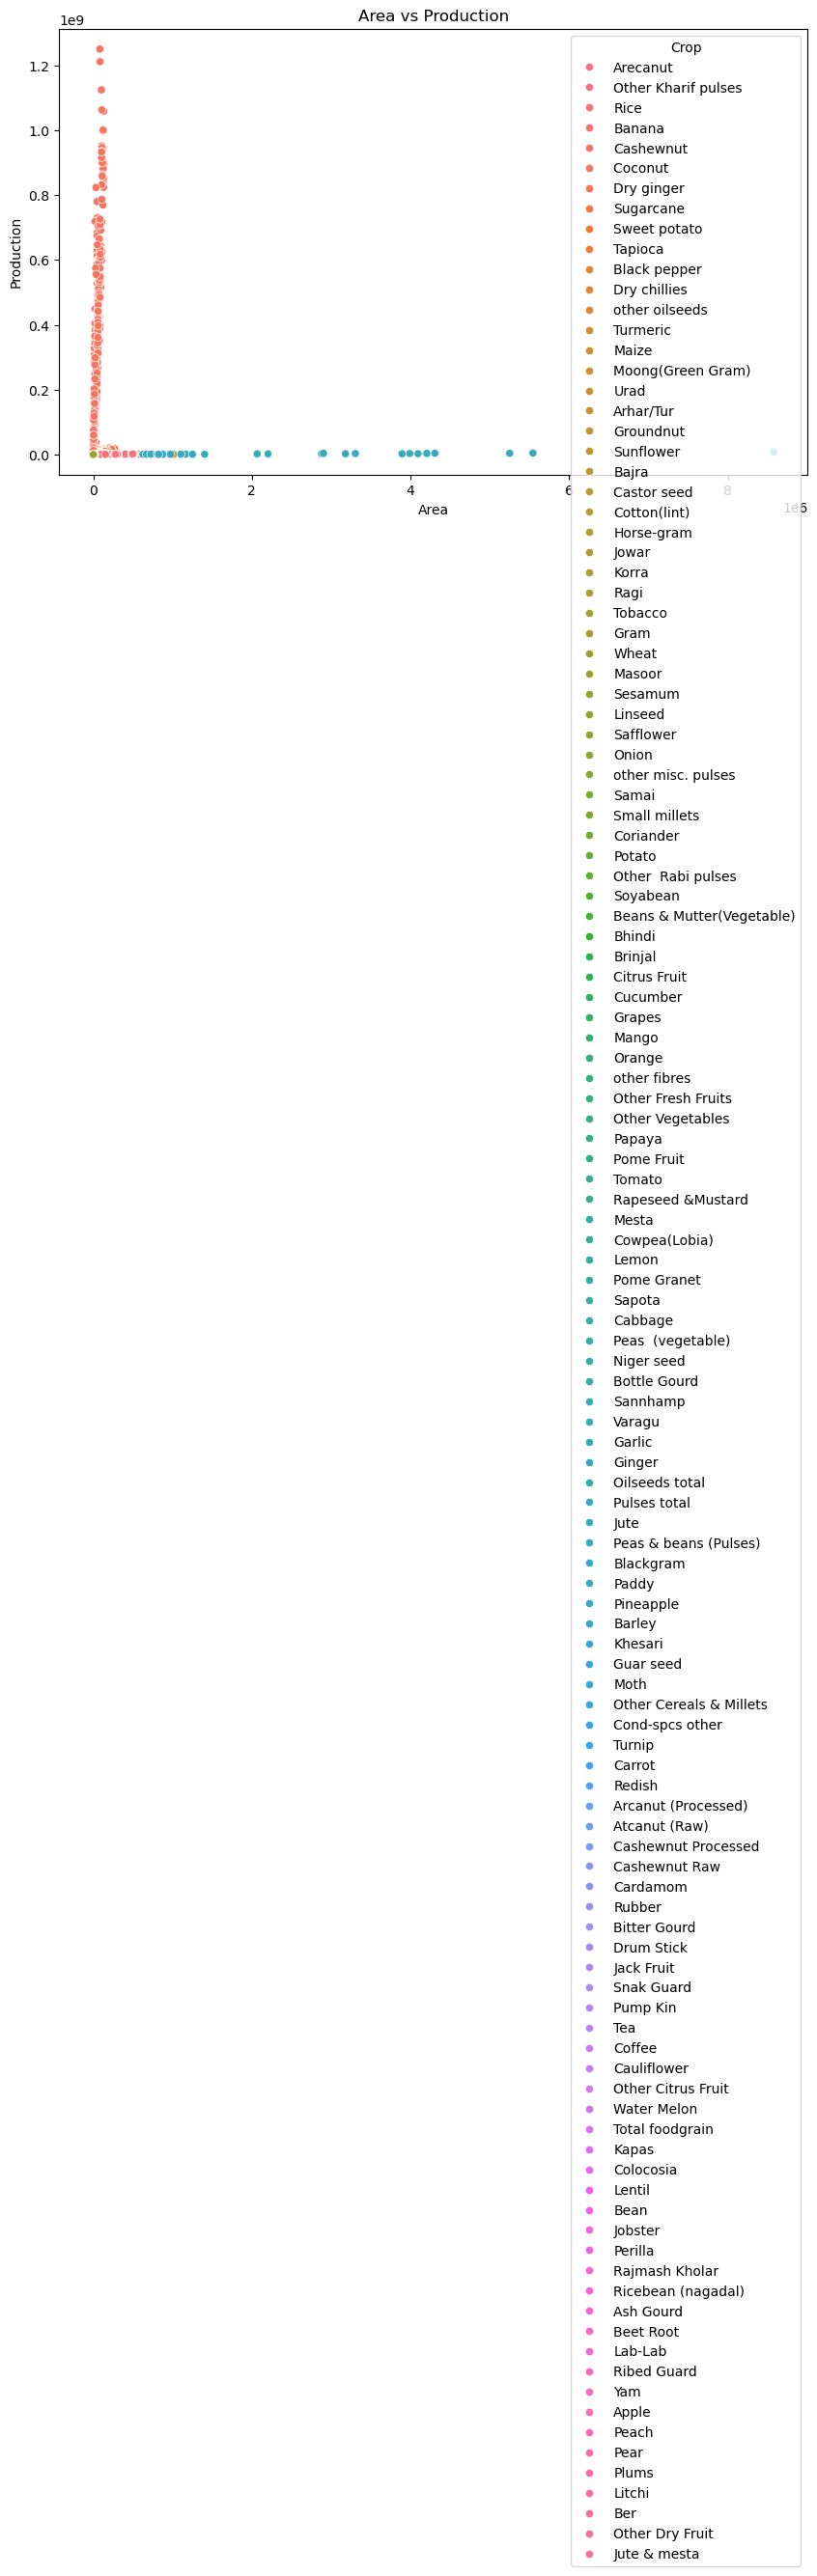

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('crop_production_data.csv')

# Check for missing values
print(data.isnull().sum())

# Fill missing Production values with median (or another approach)
data['Production'].fillna(data['Production'].median(), inplace=True)

# Basic EDA: Plotting total production over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Crop_Year', y='Production', data=data)
plt.title('Total Crop Production Over Years')
plt.show()

# Crop-wise production
crop_production = data.groupby('Crop')['Production'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 20))
crop_production.plot(kind='bar')
plt.title('Total Production by Crop')
plt.show()

# Area vs Production scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Production', hue='Crop', data=data)
plt.title('Area vs Production')
plt.show()

# Sample function for modularity
def load_and_preprocess_data(filepath):
    data = pd.read_csv(filepath)
    data['Production'].fillna(data['Production'].median(), inplace=True)
    return data



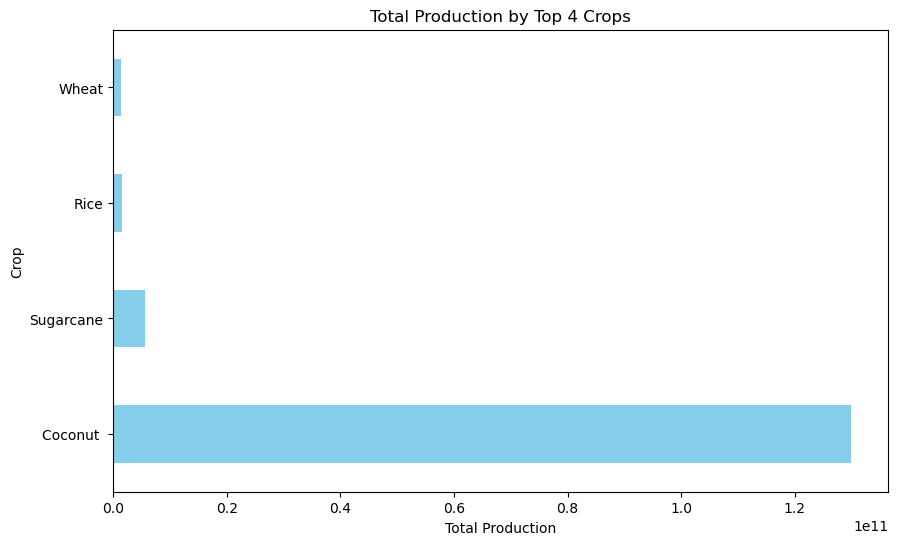

In [39]:
# Crop-wise production (Top 10 crops)
crop_production = data.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(4)
plt.figure(figsize=(10, 6))
crop_production.plot(kind='barh', color='skyblue')
plt.title('Total Production by Top 4 Crops')
plt.xlabel('Total Production')
plt.ylabel('Crop')
plt.show()


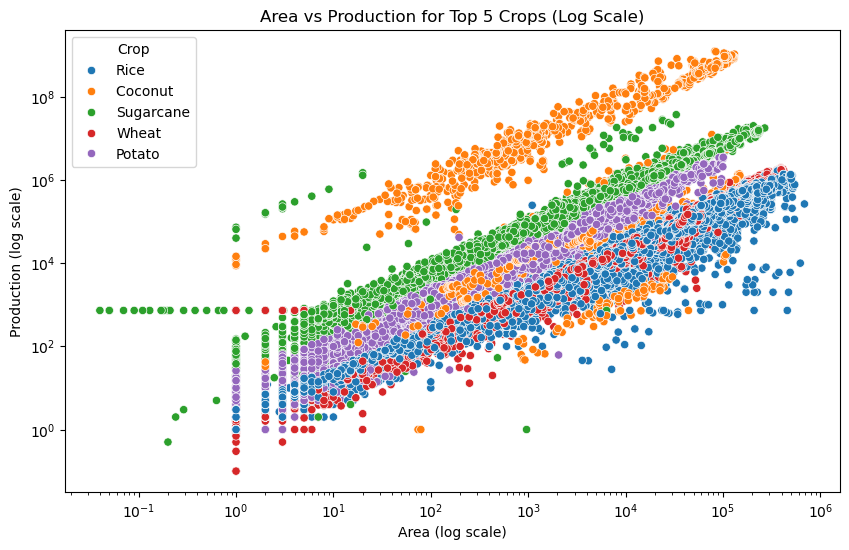

In [41]:
# Select top 5 crops by total production for clearer visualization
top_crops = data.groupby('Crop')['Production'].sum().nlargest(5).index
filtered_data = data[data['Crop'].isin(top_crops)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Production', hue='Crop', data=filtered_data)
plt.xscale('log')
plt.yscale('log')
plt.title('Area vs Production for Top 5 Crops (Log Scale)')
plt.xlabel('Area (log scale)')
plt.ylabel('Production (log scale)')
plt.legend(title='Crop')
plt.show()


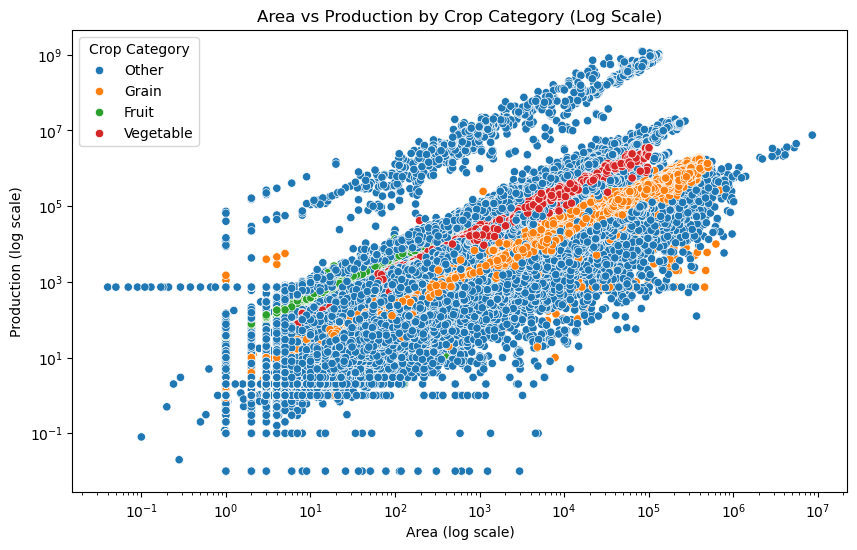

In [42]:
# Example: Manually mapping crops into categories
crop_categories = {
    'Rice': 'Grain', 'Wheat': 'Grain', 'Maize': 'Grain', 
    'Banana': 'Fruit', 'Mango': 'Fruit',
    'Potato': 'Vegetable', 'Tomato': 'Vegetable'
    # Add other crops to categories as appropriate
}

data['Crop_Category'] = data['Crop'].map(crop_categories).fillna('Other')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Production', hue='Crop_Category', data=data)
plt.xscale('log')
plt.yscale('log')
plt.title('Area vs Production by Crop Category (Log Scale)')
plt.xlabel('Area (log scale)')
plt.ylabel('Production (log scale)')
plt.legend(title='Crop Category')
plt.show()


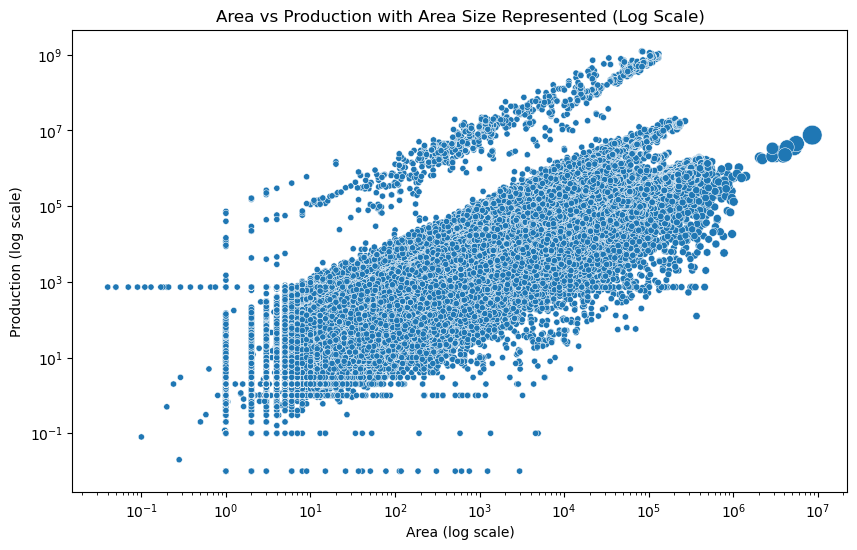

In [43]:
# Using marker size for 'Area' to represent crop extent without 'hue' for each crop
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Production', size='Area', sizes=(20, 200), data=data, legend=False)
plt.xscale('log')
plt.yscale('log')
plt.title('Area vs Production with Area Size Represented (Log Scale)')
plt.xlabel('Area (log scale)')
plt.ylabel('Production (log scale)')
plt.show()
